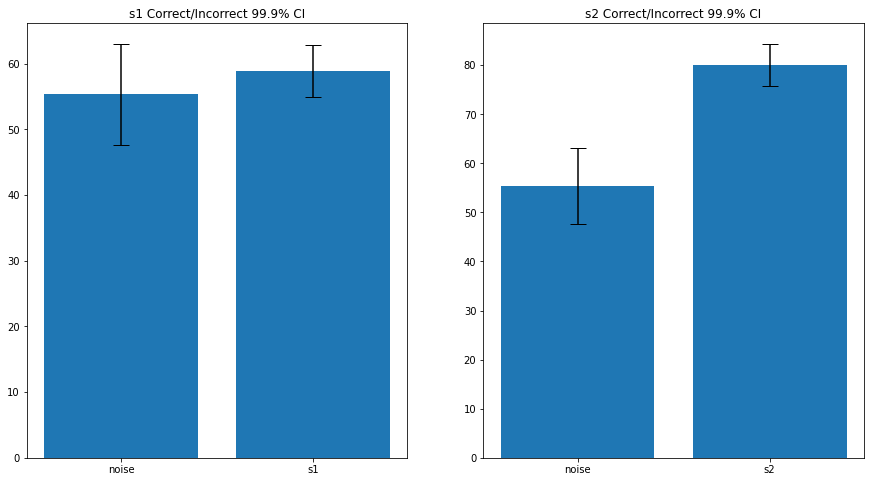

In [19]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

ax[0].bar(["noise","s1"],[55.3333,58.8889], yerr=[7.74,3.9], capsize=8)
ax[0].title.set_text("s1 Correct/Incorrect 99.9% CI")

ax[1].bar(["noise","s2"],[55.3333, 80.0769], yerr=[7.74, 4.31], capsize=8)
ax[1].title.set_text("s2 Correct/Incorrect 99.9% CI")